In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scripts import project_functions,project_functions2,project_functions3

spy = "~/project-group23-project/data/raw/spy.csv"
tsla = "~/project-group23-project/data/raw/TSLA.csv"

In [12]:
x=project_functions.load_and_clean_tsla_spy(spy,tsla)
x

(           Date    open_spy   close_spy    vol_spy
 0    1993-01-29   43.968750   43.937500    1003200
 1    1993-02-01   43.968750   44.250000     480500
 2    1993-02-02   44.218750   44.343750     201300
 3    1993-02-03   44.406250   44.812500     529400
 4    1993-02-04   44.968750   45.000000     531500
 ...         ...         ...         ...        ...
 7024 2020-12-18  370.970001  369.179993  136542300
 7025 2020-12-21  364.970001  367.859985   96386700
 7026 2020-12-22  368.209991  367.239990   47949000
 7027 2020-12-23  368.279999  367.570007   46201400
 7028 2020-12-24  368.079987  369.000000   26457900
 
 [7029 rows x 4 columns],
            Date   open_tsla  close_tsla  vol_tsla
 0    2010-06-29   19.000000   23.889999  18766300
 1    2010-06-30   25.790001   23.830000  17187100
 2    2010-07-01   25.000000   21.959999   8218800
 3    2010-07-02   23.000000   19.200001   5139800
 4    2010-07-06   20.000000   16.110001   6866900
 ...         ...         ...         ...  

In [15]:
spydfcleaned=x[0]
spydfcleaned=project_functions2.remove_dates(spydfcleaned)
spydfcleaned

,Date,open_spy,close_spy,vol_spy
0,2010-06-29,106.019997,104.209999,373649500
1,2010-06-30,103.919998,103.220001,284101700
2,2010-07-01,103.150002,102.760002,382924800
3,2010-07-02,103.110001,102.199997,233385200
4,2010-07-06,103.639999,102.870003,256935300
...,...,...,...,...
2411,2020-01-28,325.059998,326.890015,63834000
2412,2020-01-29,328.380005,326.619995,53888900
2413,2020-01-30,324.359985,327.679993,75491800
2414,2020-01-31,327.000000,321.730011,113845600


In [16]:
finalmergeddf=pd.DataFrame(project_functions3.merge_n_round(spydfcleaned))
finalmergeddf

,Date,open_spy,close_spy,vol_spy,open_tsla,close_tsla,vol_tsla
0,2010-06-29,106.02,104.21,373649500,19.00,23.89,18766300
1,2010-06-30,103.92,103.22,284101700,25.79,23.83,17187100
2,2010-07-01,103.15,102.76,382924800,25.00,21.96,8218800
3,2010-07-02,103.11,102.20,233385200,23.00,19.20,5139800
4,2010-07-06,103.64,102.87,256935300,20.00,16.11,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,325.06,326.89,63834000,568.49,566.90,11788500
2412,2020-01-29,328.38,326.62,53888900,575.69,580.99,17801500
2413,2020-01-30,324.36,327.68,75491800,632.42,640.81,29005700
2414,2020-01-31,327.00,321.73,113845600,640.00,650.57,15719300


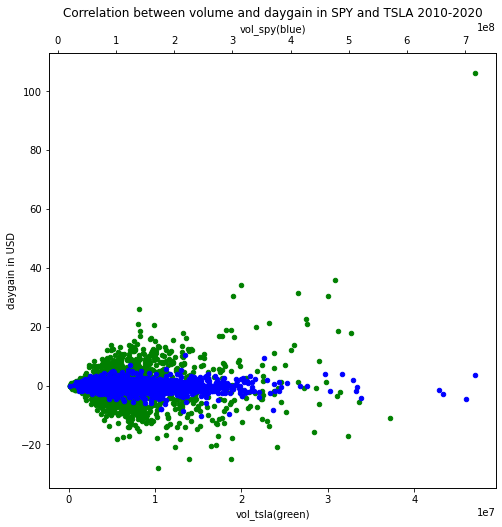

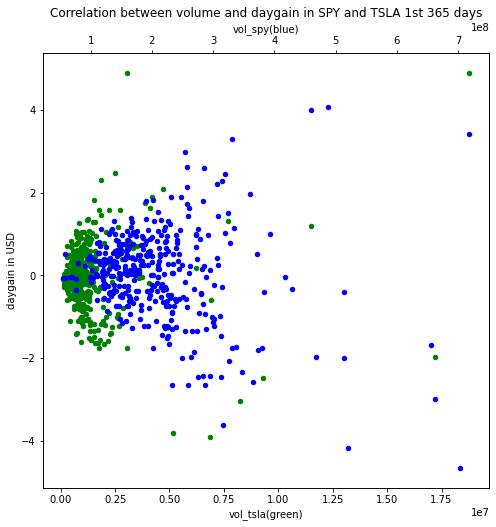

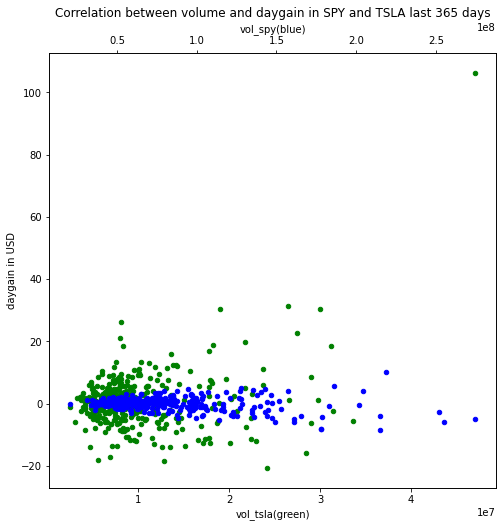

In [11]:
#TASK 4 BEGINS:
# Original plan from milestone 1: "I will be comparing and analyzing the financial data of TSLA and SPY. 
#The variables that I plan on analyzing include: Date, Open, Close, and Volume. 
#Potential questions I plan on answering are: "Does volume effect/correlate with the close price for tsla or spy?" 
#"Analysis of volume increase/decrease SPY/TSLA"
# I am also going to analyze daygain/volume/date/close price and if there are any correlations between the variables. 

#FIGURE 1 Daygain and volume: 
#plot 1: All days of data set (2010-2020)
#plot 2: 1st 365 days of data set (2010-2011)
#plot 3: last 365 days of data set (2019-2020)

dfx=finalmergeddf
dfx['daygain_tsla']=dfx['close_tsla']-dfx['open_tsla']
dfx['daygain_spy']=dfx['close_spy']-dfx['open_spy']

df = pd.DataFrame(data=dfx)

ax = df.plot(x='vol_tsla',y='daygain_tsla',xlabel='vol_tsla(green)',ylabel='daygain in USD',color="green", figsize=(8,8),kind='scatter')

ax2 = ax.twiny()
df.plot(x='vol_spy',y='daygain_spy',xlabel='vol_spy(blue)',ax=ax2, color="blue",figsize=(8,8),kind='scatter')
plt.title("Correlation between volume and daygain in SPY and TSLA 2010-2020")
plt.show()

first365=dfx.head(365)
last365=dfx.tail(365)

df = pd.DataFrame(data=first365)

ax = df.plot(x='vol_tsla',y='daygain_tsla',xlabel='vol_tsla(green)',ylabel='daygain in USD',color="green", figsize=(8,8),kind='scatter')

ax2 = ax.twiny()
df.plot(x='vol_spy',y='daygain_spy',xlabel='vol_spy(blue)',ax=ax2, color="blue",figsize=(8,8),kind='scatter')
plt.title("Correlation between volume and daygain in SPY and TSLA 1st 365 days")
plt.show()

df = pd.DataFrame(data=last365)

ax = df.plot(x='vol_tsla',y='daygain_tsla',xlabel='vol_tsla(green)',ylabel='daygain in USD',color="green", figsize=(8,8),kind='scatter')

ax2 = ax.twiny()
df.plot(x='vol_spy',y='daygain_spy',xlabel='vol_spy(blue)',ax=ax2, color="blue",figsize=(8,8),kind='scatter')
plt.title("Correlation between volume and daygain in SPY and TSLA last 365 days")
plt.show()





#The chart shows that there may be some slight correlation between the volume and day gain. Lots of the highest day gains in TSLA are on higher volume days
#there is not as much correlation with SPY. 

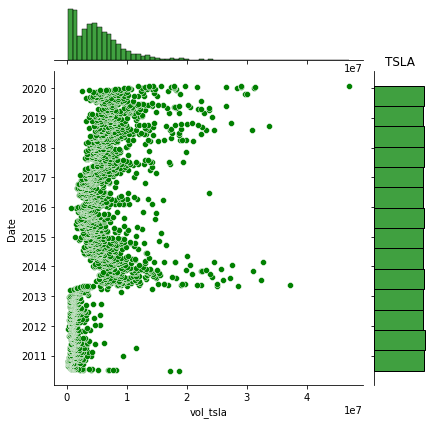

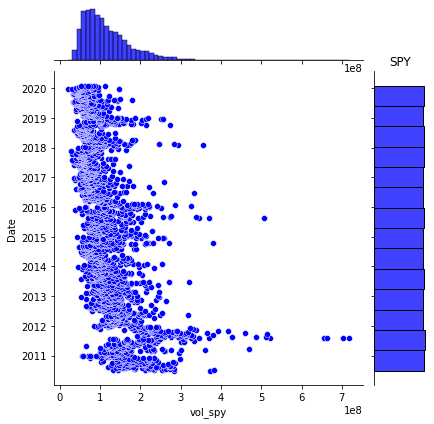

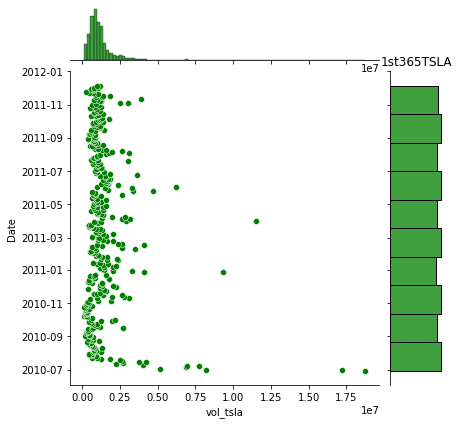

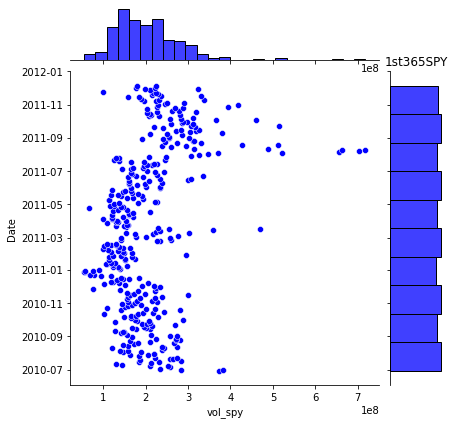

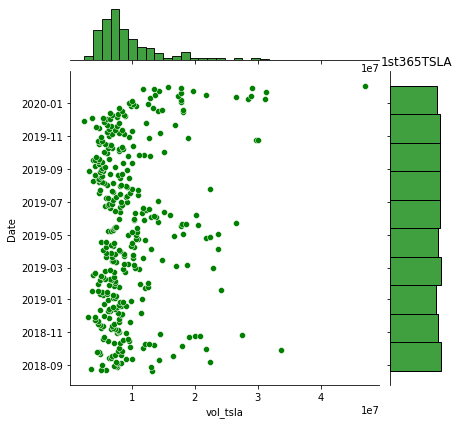

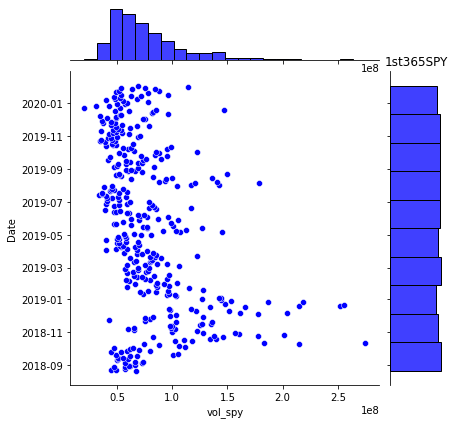

In [169]:
#TASK4 ANALYSIS CONTINUED:
#FIGURE 2 Volume by date for TSLA and SPY:
#plot 1: Volume by date for TSLA, from entire dataset (2010-2020)
#plot 2: Volume by date for SPY, from entire dataset (2010-2020)
#plot 3: Volume by date for TSLA, first 365 days from dataset (~2010-2011)
#plot 4: Volume by date for SPY, first 365 days from dataset (~2010-2011)
#plot 5: Volume by date for TSLA, last 365 days from dataset (~2019-2020)
#plot 6: Volume by date for SPY, last 365 days from dataset (~2019-2020)

df = pd.DataFrame(data=dfx)

sns.jointplot(y='Date',x='vol_tsla',data=dfx, color='green')

plt.title('TSLA')
sns.jointplot(y='Date',x='vol_spy',data=dfx,color='blue')

plt.title('SPY')
plt.show()

first365=dfx.head(365)
last365=dfx.tail(365)


sns.jointplot(y='Date',x='vol_tsla',data=first365, color='green')

plt.title('1st365TSLA')
sns.jointplot(y='Date',x='vol_spy',data=first365,color='blue')

plt.title('1st365SPY')
plt.show()


sns.jointplot(y='Date',x='vol_tsla',data=last365, color='green')

plt.title('1st365TSLA')
sns.jointplot(y='Date',x='vol_spy',data=last365,color='blue')

plt.title('1st365SPY')
plt.show()

# I wanted to see the differences in volume over the two.
# I wanted to also see this comparison at the start of the dataset vs at the end.
# There is a large increase in volume for TSLA

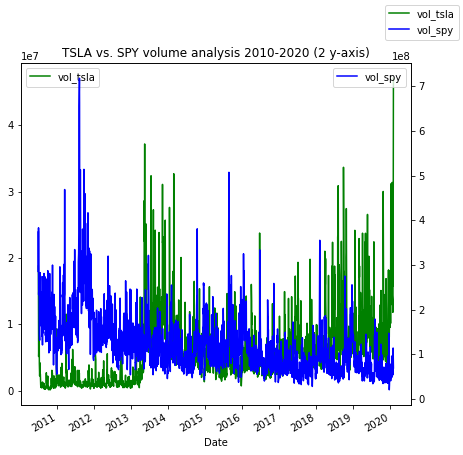

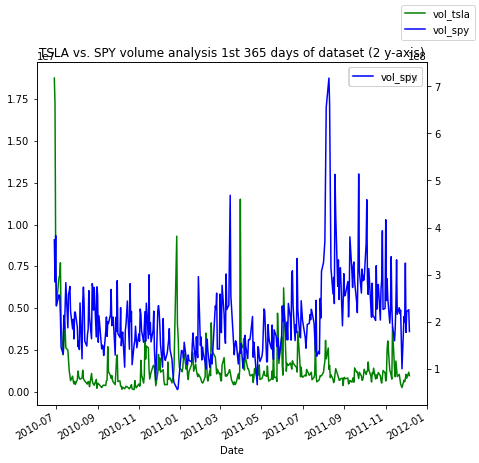

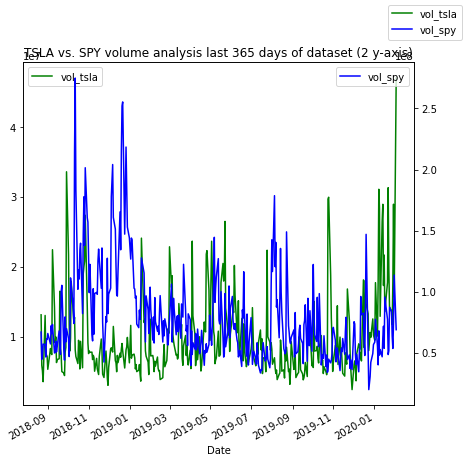

In [170]:
# TASK 4 ANALYSIS CONTINUED:
# FIGURE 3: More volume analysis between TSLA and SPY (2 y axis).
# plot 1: TSLA vs. SPY vol analysis, entire data set
# plot 2: TSLA vs. SPY vol analysis, first 365 days of dataset.
# plot 3: TSLA vs. Spy vol analysis, last 365 days of dataset.
df = pd.DataFrame(data=dfx)

ax = df.plot(x="Date", y="vol_tsla", legend=True, color="green", figsize=(7,7))

ax2 = ax.twinx()
df.plot(x="Date", y="vol_spy", ax=ax2, legend=True, color="blue",figsize=(7,7))
ax.figure.legend()
plt.title("TSLA vs. SPY volume analysis 2010-2020 (2 y-axis)")
plt.show()
first365=dfx.head(365)
last365=dfx.tail(365)

df = pd.DataFrame(data=first365)

ax = df.plot(x="Date", y="vol_tsla", legend=True, color="green", figsize=(7,7))

ax2 = ax.twinx()
df.plot(x="Date", y="vol_spy", ax=ax2, legend=True, color="blue",figsize=(7,7))
ax.figure.legend()
plt.title("TSLA vs. SPY volume analysis 1st 365 days of dataset (2 y-axis)")
plt.show()

df = pd.DataFrame(data=last365)

ax = df.plot(x="Date", y="vol_tsla", legend=True, color="green", figsize=(7,7))

ax2 = ax.twinx()
df.plot(x="Date", y="vol_spy", ax=ax2, legend=True, color="blue",figsize=(7,7))
ax.figure.legend()
plt.title("TSLA vs. SPY volume analysis last 365 days of dataset (2 y-axis)")
plt.show()

No handles with labels found to put in legend.


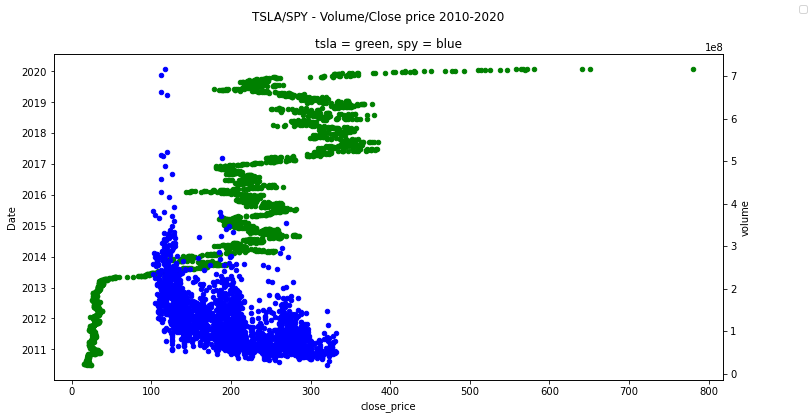

No handles with labels found to put in legend.


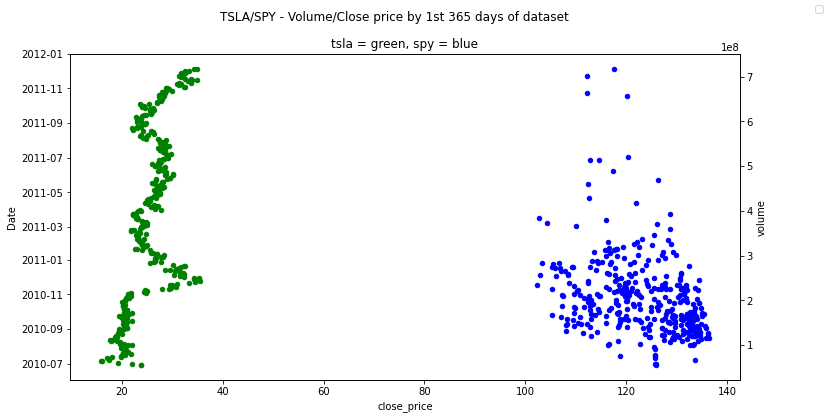

No handles with labels found to put in legend.


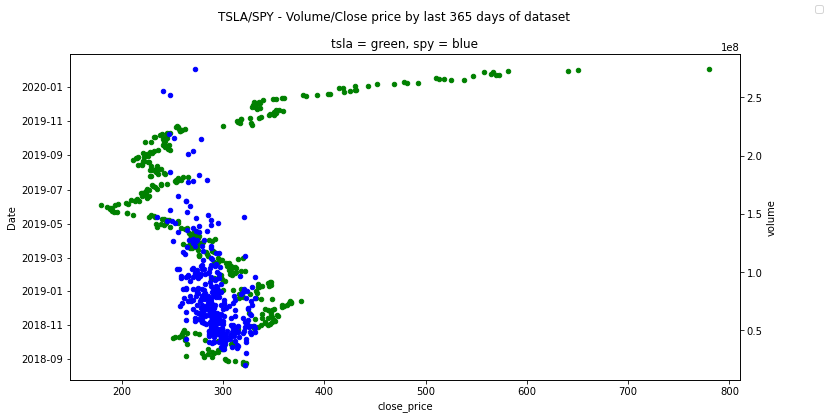

In [172]:
# TASK 4 ANALYSIS CONTINUED:
# FIGURE 4 TSLA/SPY Volume and Close price by Date.
# plot 1: TSLA/SPY Volume and Close price by Date from entire dataset
# plot 2: TSLA/SPY Volume and Close price by Date from first 365 days of dataset
# plot 3: TSLA/SPY Volume and Close price by Date from last 365 days of dataset
df = pd.DataFrame(data=dfx)

ax = df.plot(x="close_tsla", y="Date",xlabel="close_price",color="green", figsize=(12,6),kind='scatter')

ax2 = ax.twinx()
df.plot(x="close_spy", y="vol_spy",ylabel='volume', ax=ax2,xlabel="close_spy",color="blue",figsize=(12,6),kind='scatter')
ax.figure.legend()
plt.suptitle('TSLA/SPY - Volume/Close price 2010-2020')
plt.title('tsla = green, spy = blue')

plt.show()

first365=dfx.head(365)
last365=dfx.tail(365)
df = pd.DataFrame(data=first365)

ax = df.plot(x="close_tsla", y="Date",xlabel="close_price",color="green", figsize=(12,6),kind='scatter')

ax2 = ax.twinx()
df.plot(x="close_spy", y="vol_spy",ylabel='volume', ax=ax2,xlabel="close_spy",color="blue",figsize=(12,6),kind='scatter')
ax.figure.legend()
plt.suptitle('TSLA/SPY - Volume/Close price by 1st 365 days of dataset')
plt.title('tsla = green, spy = blue')

plt.show()

df = pd.DataFrame(data=last365)

ax = df.plot(x="close_tsla", y="Date",xlabel="close_price",color="green", figsize=(12,6),kind='scatter')

ax2 = ax.twinx()
df.plot(x="close_spy", y="vol_spy",ylabel='volume', ax=ax2,xlabel="close_spy",color="blue",figsize=(12,6),kind='scatter')
ax.figure.legend()
plt.suptitle('TSLA/SPY - Volume/Close price by last 365 days of dataset')
plt.title('tsla = green, spy = blue')

plt.show()



In [104]:
print(dfx.describe())

          open_spy    close_spy       vol_spy    open_tsla   close_tsla  \
count  2416.000000  2416.000000  2.416000e+03  2416.000000  2416.000000   
mean    201.604313   201.638754  1.209777e+08   186.271147   186.403651   
std      58.041192    58.028376  6.885502e+07   118.740163   119.136020   
min     103.110000   102.200000  2.027000e+07    16.140000    15.800000   
25%     144.055000   143.875000  7.353680e+07    34.342500    34.400000   
50%     202.520000   202.595000  1.037479e+08   213.035000   212.960000   
75%     247.495000   247.412500  1.493940e+08   266.450000   266.775000   
max     332.440000   331.950000  7.178287e+08   673.690000   780.000000   

           vol_tsla  daygain_tsla  daygain_spy  
count  2.416000e+03   2416.000000  2416.000000  
mean   5.572722e+06      0.132504     0.034441  
std    4.987809e+06      5.628114     1.402506  
min    1.185000e+05    -28.080000   -10.380000  
25%    1.899275e+06     -1.762500    -0.550000  
50%    4.578400e+06     -0.015

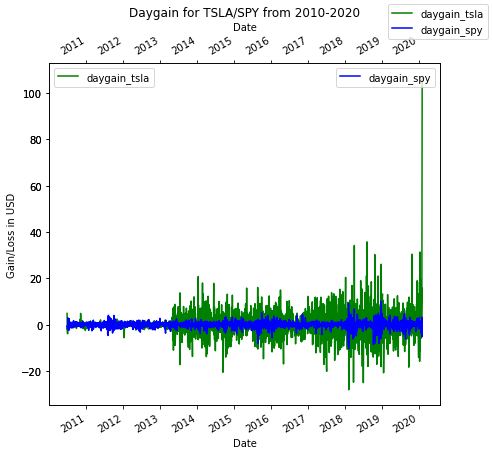

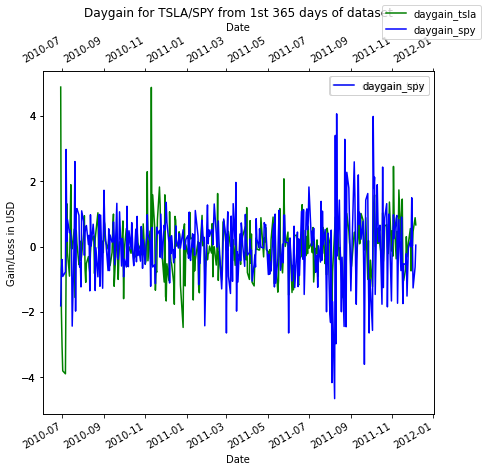

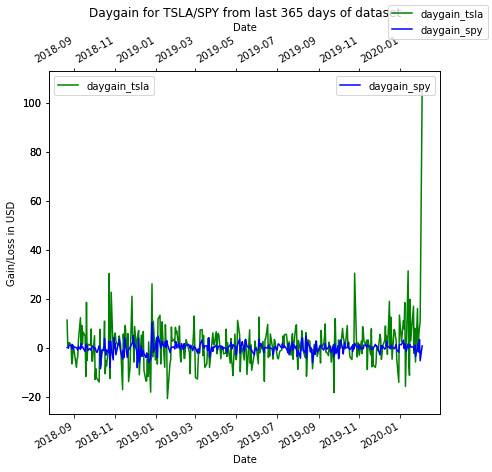

In [171]:
# TASK 4 ANALYSIS CONTINUED:
# FIGURE 5 Daygain for TSLA/SPY by date.
# plot 1: Daygain for TSLA/SPY by date - entire dataset.
# plot 2: Daygain for TSLA/SPY by date - 1st 365 days.
# plot 3: Daygain for TSLA/SPY by date - last 365 days.

df = pd.DataFrame(data=dfx)

ax = df.plot(x="Date", y="daygain_tsla", legend=True, color="green", figsize=(7,7))

ax2 = ax.twiny()
df.plot(x="Date", y="daygain_spy",ylabel='Gain/Loss in USD', ax=ax2, legend=True, color="blue",figsize=(7,7))
ax.figure.legend()
plt.title('Daygain for TSLA/SPY from 2010-2020')
plt.show()
first365=dfx.head(365)
last365=dfx.tail(365)
df = pd.DataFrame(data=first365)

ax = df.plot(x="Date", y="daygain_tsla", legend=True, color="green", figsize=(7,7))

ax2 = ax.twiny()
df.plot(x="Date", y="daygain_spy",ylabel='Gain/Loss in USD', ax=ax2, legend=True, color="blue",figsize=(7,7))
ax.figure.legend()
plt.title('Daygain for TSLA/SPY from 1st 365 days of dataset')
plt.show()
df = pd.DataFrame(data=last365)

ax = df.plot(x="Date", y="daygain_tsla", legend=True, color="green", figsize=(7,7))

ax2 = ax.twiny()
df.plot(x="Date", y="daygain_spy",ylabel='Gain/Loss in USD', ax=ax2, legend=True, color="blue",figsize=(7,7))
ax.figure.legend()
plt.title('Daygain for TSLA/SPY from last 365 days of dataset')
plt.show()

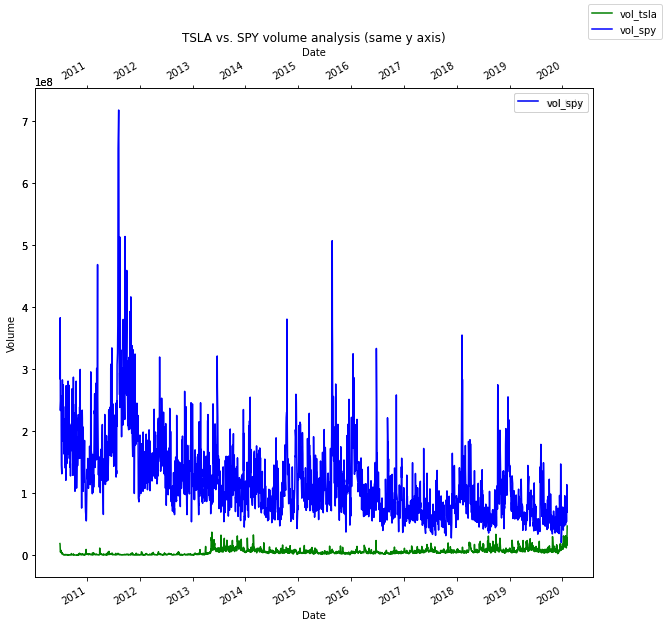

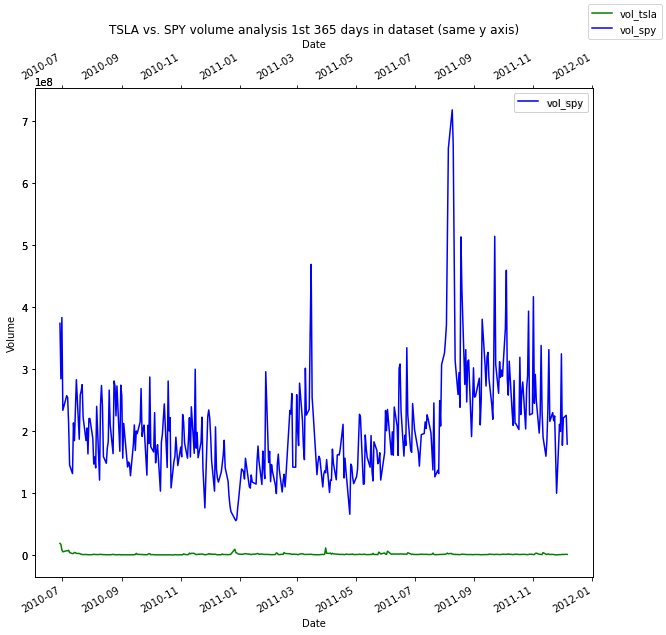

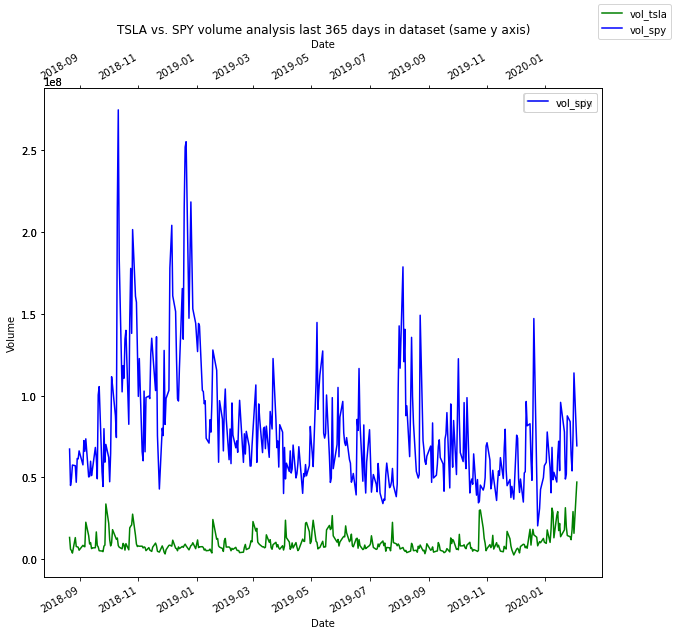

In [173]:
# TASK 4 ANALYSIS CONTINUED:
# FIGURE 6 More volume analysis between TSLA and SPY (1 Y-Axis).
# plot 1: TSLA vs. SPY vol analysis, entire data set
# plot 2: TSLA vs. SPY vol analysis, first 365 days of dataset.
# plot 3: TSLA vs. Spy vol analysis, last 365 days of dataset.




df = pd.DataFrame(data=dfx)

ax = df.plot(x="Date", y="vol_tsla", legend=True, color="green", figsize=(10,10))

ax2 = ax.twiny()
df.plot(x="Date", y="vol_spy",ylabel='Volume', ax=ax2, legend=True, color="blue",figsize=(10,10))
ax.figure.legend()
plt.title('TSLA vs. SPY volume analysis (same y axis)')
plt.show()
first365=dfx.head(365)
last365=dfx.tail(365)

df = pd.DataFrame(data=first365)

ax = df.plot(x="Date", y="vol_tsla", legend=True, color="green", figsize=(10,10))

ax2 = ax.twiny()
df.plot(x="Date", y="vol_spy",ylabel='Volume', ax=ax2, legend=True, color="blue",figsize=(10,10))
ax.figure.legend()
plt.title('TSLA vs. SPY volume analysis 1st 365 days in dataset (same y axis)')
plt.show()

df = pd.DataFrame(data=last365)

ax = df.plot(x="Date", y="vol_tsla", legend=True, color="green", figsize=(10,10))

ax2 = ax.twiny()
df.plot(x="Date", y="vol_spy",ylabel='Volume', ax=ax2, legend=True, color="blue",figsize=(10,10))
ax.figure.legend()
plt.title('TSLA vs. SPY volume analysis last 365 days in dataset (same y axis)')
plt.show()


In [176]:
dfx.describe()
# This shows us that the max day gain for TSLA is 106, SPY  is 10.
# Also shows us that the min day gain for TSLA is -28, and SPY is -10. 

717828700
47065000


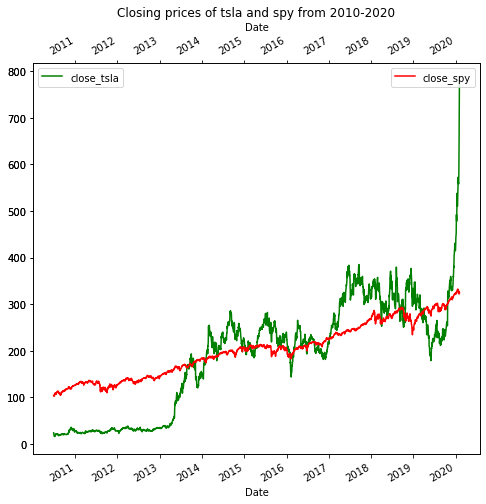

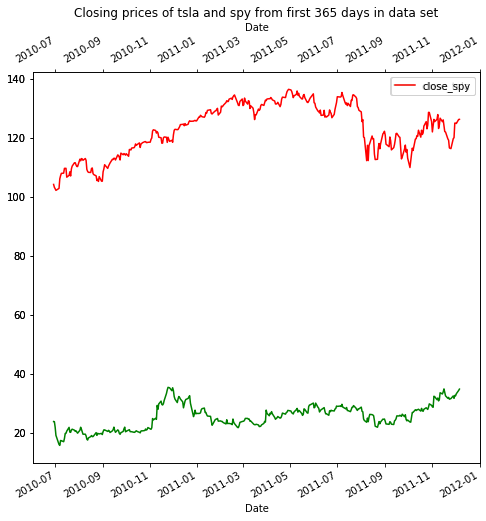

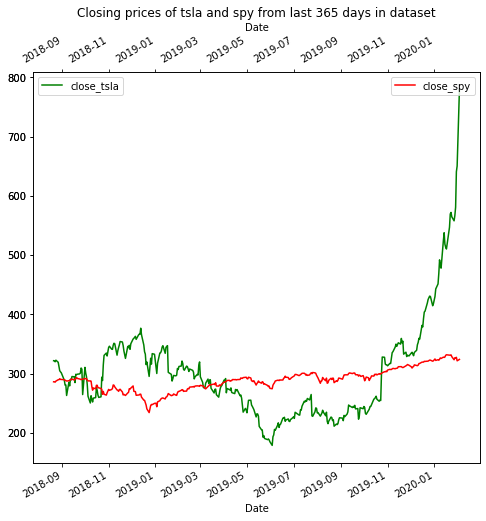

In [177]:
# TASK 4 ANALYSIS CONTINUED:
# FIGURE 7 Close price TSLA/SPY by Date:
# plot 1: Close price TSLA/SPY by Date - entire dataset
# plot 2: Close price TSLA/SPY by Date - 1st 365 days
# plot 3: Close price TSLA/SPY by Date - last 365 days


df = pd.DataFrame(data=dfx)

ax = df.plot(x="Date", y="close_tsla",color="green", figsize=(8,8))

ax2 = ax.twiny()
df.plot(x='Date', y="close_spy", ax=ax2, color="r",figsize=(8,8))
plt.title('Closing prices of tsla and spy from 2010-2020')
plt.show()

first365=dfx.head(365)
last365=dfx.tail(365)

df = pd.DataFrame(data=first365)

ax = df.plot(x="Date", y="close_tsla",color="green", figsize=(8,8))

ax2 = ax.twiny()
df.plot(x='Date', y="close_spy", ax=ax2, color="r",figsize=(8,8))
plt.title('Closing prices of tsla and spy from first 365 days in data set')
plt.show()

df = pd.DataFrame(data=last365)

ax = df.plot(x="Date", y="close_tsla",color="green", figsize=(8,8))

ax2 = ax.twiny()
df.plot(x='Date', y="close_spy", ax=ax2, color="r",figsize=(8,8))
plt.title('Closing prices of tsla and spy from last 365 days in dataset')
plt.show()

